In [64]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from PIL import Image
import random
import os
# from torchsummary import summary
from mypy import NuCLSDataset, load_data, Trainer 
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [12]:
im_save_dir = "../DATASET/nuc"
class2idx = {'raw_classification':0, "main_classification":1, 'super_classification':2}
idx2class = {0:'raw_classification', 1:"main_classification", 2:'super_classification'}
# X, y = load_data(im_save_dir, classification = idx2class[2])

# data = NuCLSDataset(X=X, y=y, mode='CNN', bkgd='avg')
# iter = 0
# stop = 5
# for samples in data:
#     im, y = samples
#     plt.figure()
#     plt.title(y)
#     plt.imshow(im.transpose(1,2,0))
#     plt.show()
#     print(im.shape)
#     iter+=1
#     if iter > stop:
#         break


In [13]:
class BloodCell_CNN(nn.Module):
    def __init__(self, num_classes=4):
        super().__init__()
        # three convolutional layer network with max pooling, batch norm, and a fully connected linear layers
        # adding a skip connection
        # relu activation function 

        # conv  
        # self.conv1 = nn.Conv2d(3,10, kernel_size=5, stride=1)
        self.conv1 = nn.Conv2d(3,50, kernel_size=5, stride=1)
        # self.conv2 = nn.Conv2d(10,20, kernel_size=5, stride = 2, padding=1)
        self.conv2 = nn.Conv2d(50,80, kernel_size=5, stride = 2, padding=1)
        # self.conv3 = nn.Conv2d(20,100, kernel_size=5, stride = 2, padding=1)
        self.conv3 = nn.Conv2d(80,100, kernel_size=5, stride = 2, padding=1)

        # pool 
        self.pool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.pool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        self.pool3 = nn.MaxPool2d(kernel_size=3, stride=2)

        # activation function
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=-1)

        # dropout layer
        self.dropout = nn.Dropout(0.8)

        # batch normalization
        self.bn1 = nn.BatchNorm2d(50)
        self.bn2 = nn.BatchNorm2d(80)
        self.bn3 = nn.BatchNorm2d(100)

        # flatten
        self.flatten = nn.Flatten()

        # fully connected layer
        fcconst = 100
        self.fc1 = nn.Linear(fcconst, fcconst)
        self.fc2 = nn.Linear(fcconst, num_classes)

    def forward(self, x):

        """
        Design the process of your network.
        """

        if len(x.shape) == 3:            # if one single image is passed, make sure it's of dimension (1, 3, H, W)
            x = x.unsqueeze(0)
        
        ### YOUR CODE HERE
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)
        x = self.flatten(x)
        temp = x
        x = self.fc1(x)
        x += temp
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x   # do not apply softmax

model = BloodCell_CNN()
summary(model, (3, 75, 75))

NameError: name 'summary' is not defined

In [29]:
# from sklearn.decomposition import PCA
# import seaborn as sns
# X, y = load_data(im_save_dir, classification = idx2class[2])
# print(X.shape)
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X.reshape(X.shape[0], X.shape[1]*X.shape[2]*X.shape[3]))
# plt.figure(figsize=(10,10))
# sns.scatterplot(
#     x=X_pca[:,0], y=X_pca[:,1],
#     hue=y,
#     palette=sns.color_palette("hls", 10),
#     legend="full",
#     alpha=0.75)

# plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X, y = load_data(im_save_dir, classification = idx2class[2])
scalar = StandardScaler()
X = scalar.fit_transform(X.reshape(-1, 75*75*3))
X = X.reshape(-1, 3, 75, 75)
encoder = OneHotEncoder()
y = encoder.fit_transform(y.reshape(-1,1)).toarray()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

train_data = NuCLSDataset(X=X_train, y=y_train, mode='CNN', bkgd='black')
test_data = NuCLSDataset(X=X_test, y=y_test, mode='CNN', bkgd='black')

In [17]:
train_data[0][1]

tensor([0., 0., 0., 1.])

{'train_loss_list': [1.302787509918213,
  1.2884816513061523,
  1.28470832157135,
  1.2814291458129885,
  1.2750597934722905,
  1.2778032884597774,
  1.2692545719146726,
  1.2727727060317995,
  1.2693024997711182,
  1.268600971221924,
  1.2685347833633422,
  1.2642919254302982,
  1.260956974029541,
  1.2626375293731693,
  1.261379371643066,
  1.2621045703887939,
  1.2584937944412236,
  1.2519863700866702,
  1.2538016595840453,
  1.2539733772277832,
  1.2506245555877686,
  1.2533108406066895,
  1.2493351793289187,
  1.249569858551025,
  1.2436005496978764,
  1.2423687715530398,
  1.242047029495239,
  1.2376249046325687,
  1.2365663070678712,
  1.2375901746749878,
  1.2328114843368527,
  1.2301115732192993,
  1.226611869812012,
  1.222468729019165,
  1.2199643669128415,
  1.2127283115386964,
  1.211957786560059,
  1.2112947397232052,
  1.2075405836105348,
  1.1998075571060183,
  1.1982217636108399,
  1.1915515832901002,
  1.1872595348358155,
  1.1838161182403566,
  1.17315216255188,
  1.

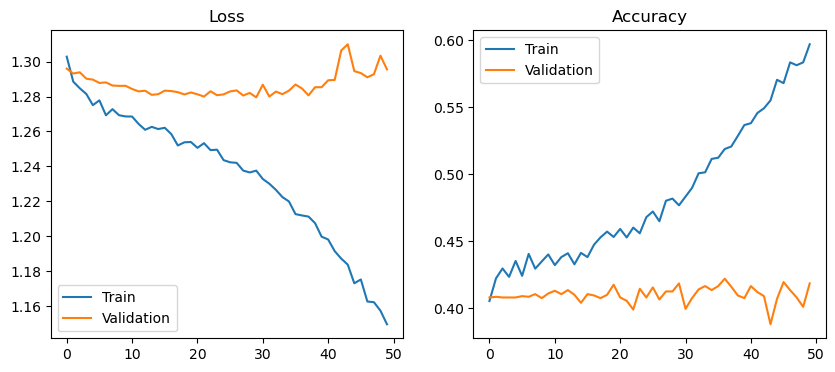

In [33]:
trainer = Trainer(model, "adam", 1e-4, 128, 50, 1e-5)
trainer.train(train_data, test_data)

# Logistic Regression Classifier

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier 
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
clf = OneVsRestClassifier(LogisticRegression(penalty='l2', C = 0.9, solver='lbfgs', random_state = 42, class_weight='balanced'))


In [40]:
train_data # images by image dims by classes
X_train.shape

(8000, 3, 75, 75)

In [65]:
import pickle
pickle_path = os.path.join(im_save_dir, 'nuc_data.pkl')

def load_dataset(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data 

data = load_dataset(pickle_path)

In [84]:
X = np.array([data[i][0] for i in range(len(data))])
y = np.array([data[i][1][2] for i in range(len(data))])
print(X)
print(y)

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]


 [[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]

  [[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
 

In [85]:
pca = PCA(n_components=0.95)
# X_pca = pca.fit_transform(X.reshape(-1, 100*100*3))
X_pca = pca.fit_transform(X.reshape(-1, 80*80*3))
print(X_pca)

: 

: 

In [42]:


# # Load your dataset of images
# # Assuming you have your dataset stored in 'images.npy'
# images = train_data[0][0]

# images_np = np.array([tensor.detach().cpu().numpy() for tensor in images])
# print(images_np)

# # Flatten each image into a vector
# data = images_np.reshape(-1, images_np.shape[-1])

# # Normalize the data
# data = data.astype(float)
# data /= 255.0

# Define the number of clusters
num_clusters = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X_pca)

# Get the cluster labels
labels = kmeans.labels_

# # Reshape the clustered data back to the image shape
# clustered_images = labels.reshape(images_np.shape[:2])

# # Display the original and clustered images
# # plt.figure(figsize=(10, 4))
# # plt.subplot(1, 2, 1)
# # plt.title('Original Image')
# # plt.imshow(images_np)

# plt.subplot(1, 2, 2)
# plt.title('Clustered Image')
# plt.imshow(clustered_images, cmap='viridis')
# plt.colorbar()
# plt.show()

[[[-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  ...
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]]

 [[-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  ...
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]]

 [[-0.0100005 -0.0100005 -0.0100005 ... -0.0100005 -0.0100005 -0.0100005]
  [-0.0100005 -0.01000

/Users/sfurlow/opt/anaconda3/envs/c242/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [63]:
y_train_true_labs = encoder.inverse_transform(y_train)
print(y_train_true_labs.shape)

sclass2idx = {'nonTIL_stromal': 0, 'other_nucleus': 1, 'sTIL': 2, 'tumor_any': 3}
y_train_labs_list = y_train_true_labs.squeeze().tolist()
y_train_num = [sclass2idx[y_val] for y_val in y_train_labs_list]

acc = (sum(labels==y_train_num))/len(labels) 
print(acc)



(8000, 1)
0.227375
